# 패키지 설치


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyLDAvis
!pip install selenium
pip install jamo
!pip install BeautifulSoup4
!apt update
!apt install chromium-chromedriver

#Install Mecab

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 33), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
ls user-dic

nnp.csv  person.csv  place.csv  README.md


In [ ]:
cp "/content/drive/My Drive/GitHub/2020-2-OSSP1-WhatsUp-5/text_mining/data/nnp.csv" "./user-dic/nnp.csv"

In [ ]:
# 정상적으로 DRIVE에서 COPY 되었는지 확인
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_new = f.readlines() 
#file_new

In [ ]:
ls tools

In [ ]:
!bash ./tools/add-userdic.sh

In [ ]:
!make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


#Install Java

In [ ]:
cd /content

/content


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


#Install Mallet

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities


# spacy for lemmatization
import spacy
 
# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
 
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Load


In [ ]:
cd "/content/drive/My Drive/GitHub/2020-2-OSSP1-WhatsUp-5/text_mining"

/content/drive/My Drive/GitHub/2020-2-OSSP1-WhatsUp-5/text_mining


In [ ]:
from utils import get_stopword, df_to_dic, to_syn, preprocess, get_nouns_from_csv

In [ ]:
from konlpy.tag import Mecab
import pandas as pd
from tqdm import tqdm

In [ ]:
from health_chosun_crawling import get_article

In [ ]:
# Load Data
# data = get_article()
data = pd.read_csv("data/article.csv", encoding="utf-8")
stopword = get_stopword()
df = pd.read_csv("data/disease_list.csv", encoding="utf-8")
synonym = df_to_dic(df=df)

# load article data and extract nouns
word_list = get_nouns_from_csv(data=data, stopword=stopword, synonym=synonym)

100%|██████████| 1014/1014 [00:02<00:00, 364.53it/s]


Noun Extraction Complete


In [ ]:
word_list

# LDA 분석

In [ ]:
from LDAutils import compute_coherence_values, coherence_graph, mallet_to_lda

In [ ]:
# create Dictionary
id2word=corpora.Dictionary(word_list)
id2word.filter_extremes(no_below=20)

# create Corpus
texts = word_list

# Term Document Frequency
corpus=[id2word.doc2bow(text) for text in texts]

## Human readable format of corpus (term-frequency)
# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [ ]:
# LDA lib Mallet 환경설정
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
limit=31; start=6; step=3;

In [ ]:
model_list, coherence_values, topic_idx = compute_coherence_values(mallet_path=mallet_path ,id2word=id2word, 
                                                        corpus=corpus, texts=texts, 
                                                        start=start, limit=limit, step=step)

100%|██████████| 9/9 [06:10<00:00, 41.15s/it]


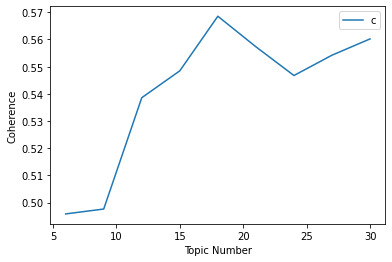

In [ ]:
# 생성한 모델의 일관성 점수 그래프
coherence_graph(start=start, limit=limit, step=step, 
                coherence_values=coherence_values, path="output/coherence_values.png")

In [ ]:
# 적절한 mallet LDA 모델을 선택하여 Gensim LDA 모델로 변환
ldamallet = model_list[topic_idx]
model = mallet_to_lda(ldamallet)

# Model 저장 및 평가(Coherence Score)
생성된 모델을 저장하거나 복구한다.

In [ ]:
from gensim.test.utils import datapath
lda_path = "./model/model.lda"
model.save(lda_path)

In [ ]:
# Compute Coherence Score

print('\nCoherence Score: ', coherence_values[topic_idx])



Coherence Score:  0.5685578800140081


# Model 백업 및 평가(Coherence Score)

In [ ]:
lda_path = "./model/model.lda"
model = gensim.models.LdaModel.load(lda_path)

In [ ]:
# LDA Load 했을시
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.3787656465020496


# LDA 토픽 분석 결과

In [ ]:
from LDAutils import summary

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word, R=15)
pyLDAvis.display(vis)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [ ]:
# pyLDAvis 결과 저장
pyLDAvis.save_html(vis, './output/LDA_Map.html')

In [ ]:
result = summary(model=model, corpus=corpus, texts=texts)
result

,Keywords,Num_Documents,Perc_Documents
0,"환자, 병원, 치료, 교수, 이상, 진료, 평가, 약물, 내과, 보험",130,0.1386
1,"당뇨병, 지방, 대사, 이상, 증가, 혈당, 비만, 조절, 개선, 체중",115,0.1226
2,"음식, 섭취, 비타민, 효과, 단백질, 도움, 건강, 식품, 부족, 소변",107,0.1141
3,"백신, 독감, 접종, 예방, 사망, 이상, 사례, 조사, 확인, 의원",96,0.1023
4,"여성, 남성, 기능, 정상, 호르몬, 감소, 아이, 임신, 상태, 소아",74,0.0789
5,"장애, 건강, 수면, 스트레스, 치매, 노인, 우울증, 정신, 국민, 원장",53,0.0565
6,"운동, 생활, 관절, 효과, 중요, 유지, 무릎, 습관, 활동, 건강",49,0.0522
7,"질환, 혈관, 혈액, 위험, 심장, 뇌졸중, 혈압, 발생, 심혈, 고혈압",44,0.0469
8,"임상, 개발, 치료제, 바이오, 국내, 코로나19, 생산, 시험, 기업, 의약품",41,0.0437
9,"검사, 진단, 암, 발생, 증가, 확인, 최근, 이상, 발견, 가능",40,0.0426


In [ ]:
from utils import get_disease_in_keywords

In [ ]:
df = pd.read_csv("data/disease_list.csv", encoding="utf-8")
get_disease_in_keywords(result_df=result, disease_df=df)